## Huffman

Given a list of probablities P, assert sum(pi)==1.

Initialize codebook C of n empty lists.

Order P of length n descending.

Sum P[-1]+P[-2]

C[-1].append(1)

C[-2].append(0)

Reorder P of length n-1.

Repeat


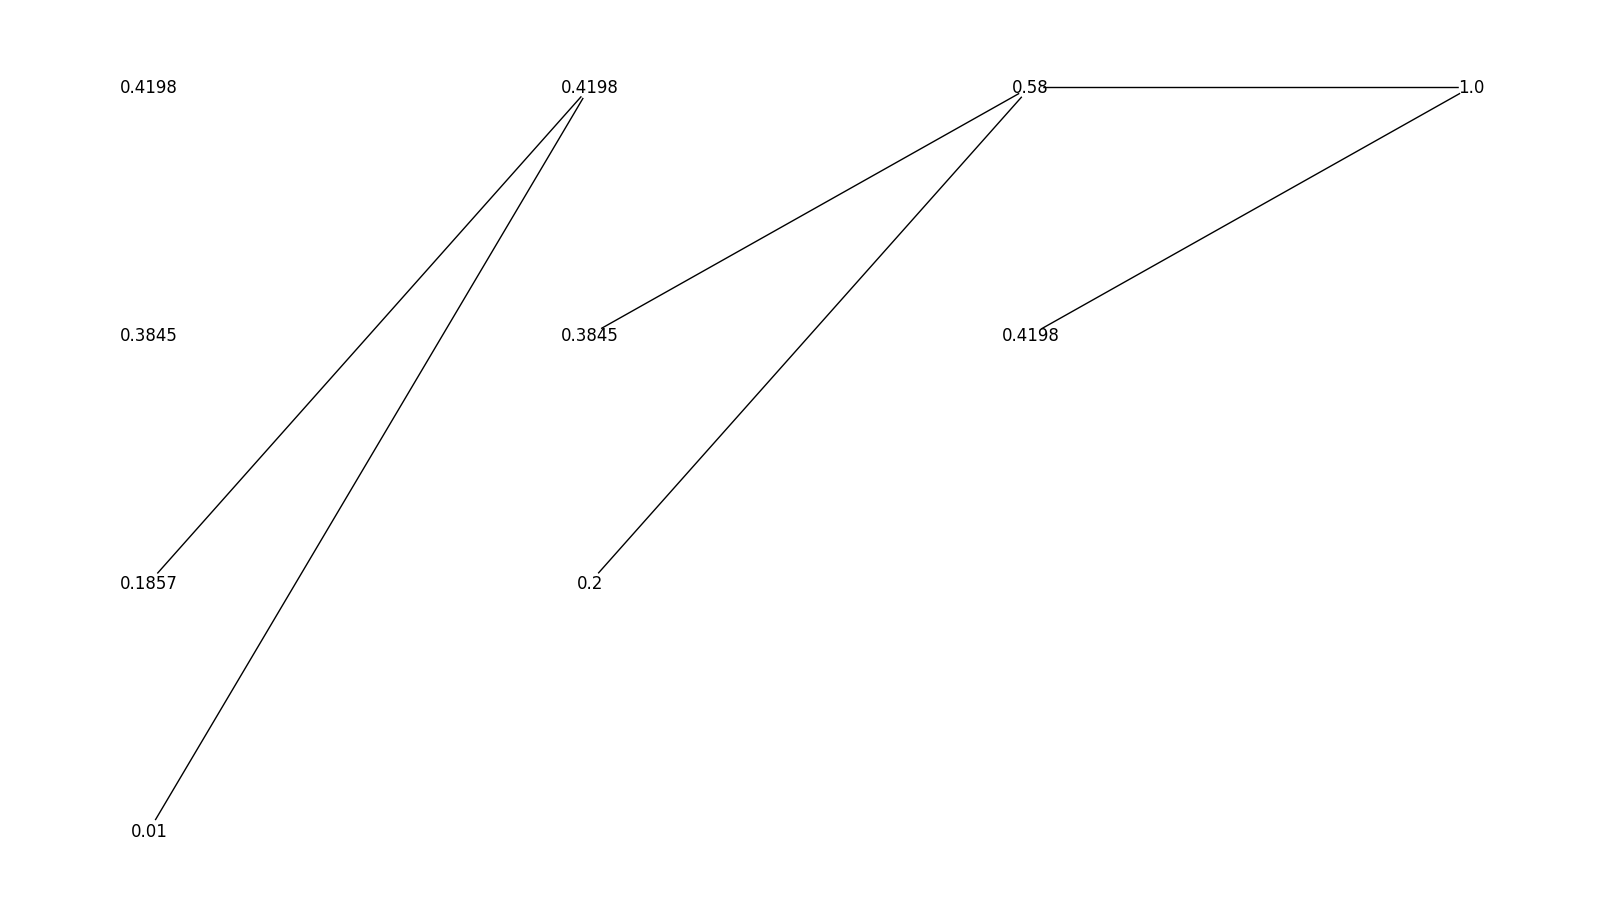

In [330]:
import numpy as np
import networkx as nx

def Huffman(P,tol):
    
    assert np.sum(P)>=abs(1.0-tol)

    Codebook=[[] for i in range(len(P))]
    History=[]
    for i in range(len(P)):
        P=sorted(P,reverse=True)
        History.append(P)
        P,k=P[:-2],round(np.sum(P[-2:]),2)
        P.append(k)
        P=sorted(P,reverse=True)
    L=History
    G=nx.Graph()
    DL=[i for i in range(len(L))]
    pos={}
    labels={}
    for i in range(len(L)):
        DL[i]=[f"L_{i}_{j}" for j in range(len(L[i]))]
        G.add_nodes_from(DL[i])
        for j, node in enumerate(DL[i]):
            pos[node]=(i,-j)
        for j, val in enumerate(L[i]):
            labels[f"L_{i}_{j}"]=val
    for i in range(len(L)):
        if i!=len(L)-1:
            k=len(L[i+1])
            ind=np.array(np.where(([abs(L[i+1][j]-np.sum(L[i][-2:]))<=tol for j in range(k)]))).flatten()
            if ind.size>0:
                ind=ind[0]
            else:
                ind=0
            G.add_edge(DL[i][-1],DL[i+1][ind])
            G.add_edge(DL[i][-2],DL[i+1][ind]) 

    nx.draw(G, pos, labels=labels, with_labels=True, node_color='white')
    return(plt.show())

X=[round(i,4) for i in np.random.dirichlet(np.ones(4))]

plt.figure(figsize=(16,9))
Huffman(X,tol=1e-3)
